In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_context("paper")

In [3]:
pbmc = pd.read_csv('COVID_pbmc_data.csv',index_col=0)

In [4]:
tape = pd.read_csv('COVIDisletpred_tape.csv',index_col=0)
scaden = pd.read_csv('COVIDisletpred_scaden.csv',index_col=0)
csx = pd.read_csv('COVIDisletpred_csx.csv',index_col=0)
rnasieve = pd.read_csv('COVIDisletpred_rnasieve.csv',index_col=0)
dwls = pd.read_csv('COVIDisletpred_dwls.txt',sep='\t',index_col=0)
tape['sample'] = ['normal_culture','normal_culture',
                  'covid19_infection', 'covid19_infection',
                  'infection+Remdesivir', 'infection+Remdesivir']
scaden['sample'] = ['normal_culture','normal_culture',
                    'covid19_infection', 'covid19_infection',
                    'infection+Remdesivir', 'infection+Remdesivir']
csx['sample'] = ['normal_culture','normal_culture',
                 'covid19_infection', 'covid19_infection',
                 'infection+Remdesivir', 'infection+Remdesivir']
rnasieve['sample'] = ['normal_culture','normal_culture',
                      'covid19_infection', 'covid19_infection',
                      'infection+Remdesivir', 'infection+Remdesivir']
dwls['sample'] = ['normal_culture','normal_culture',
                  'covid19_infection', 'covid19_infection',
                  'infection+Remdesivir', 'infection+Remdesivir']
tape['model'] = ['TAPE' for i in range(len(tape))]
scaden['model'] = ['Scaden' for i in range(len(tape))]
rnasieve['model'] = ['RNAsieve' for i in range(len(tape))]
csx['model'] = ['CIBERSORTx' for i in range(len(tape))]
dwls['model'] = ['DWLS' for i in range(len(tape))]

data = pd.concat([tape,scaden,rnasieve,csx,dwls])

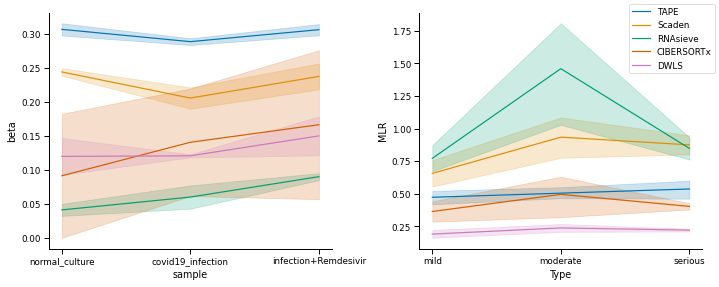

In [5]:
colors = sns.color_palette('colorblind',5)
fig,axes = plt.subplots(1,2,figsize=(10,4))

sns.lineplot(x='sample',y='beta',hue='model',
             data=data,palette='colorblind',
             ax=axes[0],
             ci=60)
sns.lineplot(data=pbmc,x='Type',y='MLR',hue='model',
             ax=axes[1],
             ci=60,palette='colorblind')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].get_legend().set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].get_legend().set_visible(False)
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
#fig.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)
plt.tight_layout()
plt.show()

In [10]:
colors = sns.color_palette('Blues',3)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


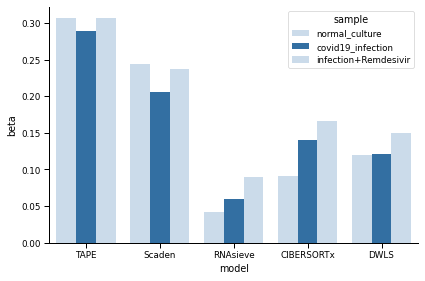

In [12]:
fig,ax = plt.subplots(figsize=(6,4))
sns.barplot(data=data,x='model',y='beta',hue='sample',ci=0,
            palette={'normal_culture':colors[0],
                     'covid19_infection':colors[2],
                     'infection+Remdesivir':colors[0]})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
fig.savefig('islet.eps',format='eps',dpi=300)
plt.show()